# Exploratory Data Analysis for Dataset 1: Heart Disease Dataset

## Importing Libraries

In [269]:
import sklearn
import numpy as np
import pandas as pd
import os
import tarfile
import urllib
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import urllib.request
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sb
from itertools import product
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import pointbiserialr, chi2_contingency

## Retrieving and Cleaning (Lab 1)
- Getting CSV file
- Retrieving basic information on the dataset
- Removing duplicates and instances with null values

In [270]:
df=pd.read_csv('../../data/dataset/original_datasets/heart_2020_cleaned.csv')

In [271]:
#First 10 rows of the dataframe
df.head(10)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [273]:
isNull = df.isna().sum()
duplicates_no = df.duplicated().sum()
print('Null values:\n',isNull)
print('\n\nDuplicates: ', duplicates_no)
df_shape = df.shape

Null values:
 HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


Duplicates:  18078


In [274]:
has_nans = df.isnull().values.any()
if has_nans:
    print("DataFrame contains NaNs (missing values).")
    # You can further investigate which columns have NaNs:
    nan_counts = df.isnull().sum()
    print("Number of NaNs per column:\n", nan_counts)
else:
    print("DataFrame does not contain NaNs (missing values).")

DataFrame does not contain NaNs (missing values).


In [275]:
df.drop_duplicates(inplace=True)
print('Dataframe shape before:', df_shape)
print('\nDataframe shape after:', df.shape)

Dataframe shape before: (319795, 18)

Dataframe shape after: (301717, 18)


In [276]:
df=df.reset_index(drop=True)
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


Heart Disease Count: 
 HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64 



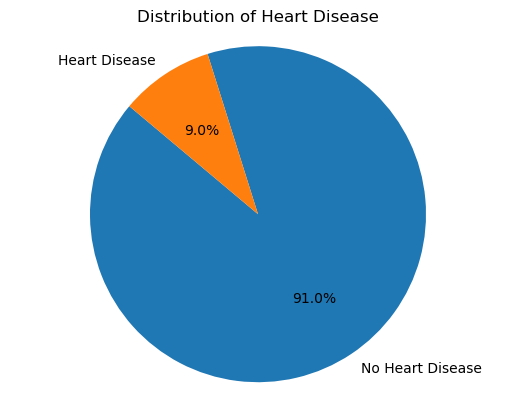

In [277]:

counts = df['HeartDisease'].value_counts()
print ('Heart Disease Count: \n' , counts, '\n')
plt.pie(counts, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Heart Disease')
plt.show()


In [278]:
df['Diabetic'].value_counts()

Diabetic
No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: count, dtype: int64

Making the diabetic feature binary due to the borderline and during pregnancy categories making up only 3%

In [279]:
df['Diabetic'] = df['Diabetic'].replace({
    'No, borderline diabetes': 'Boderline',
    'Yes (during pregnancy)': 'Pregnancy'
})

## General Statistics and VIsualization

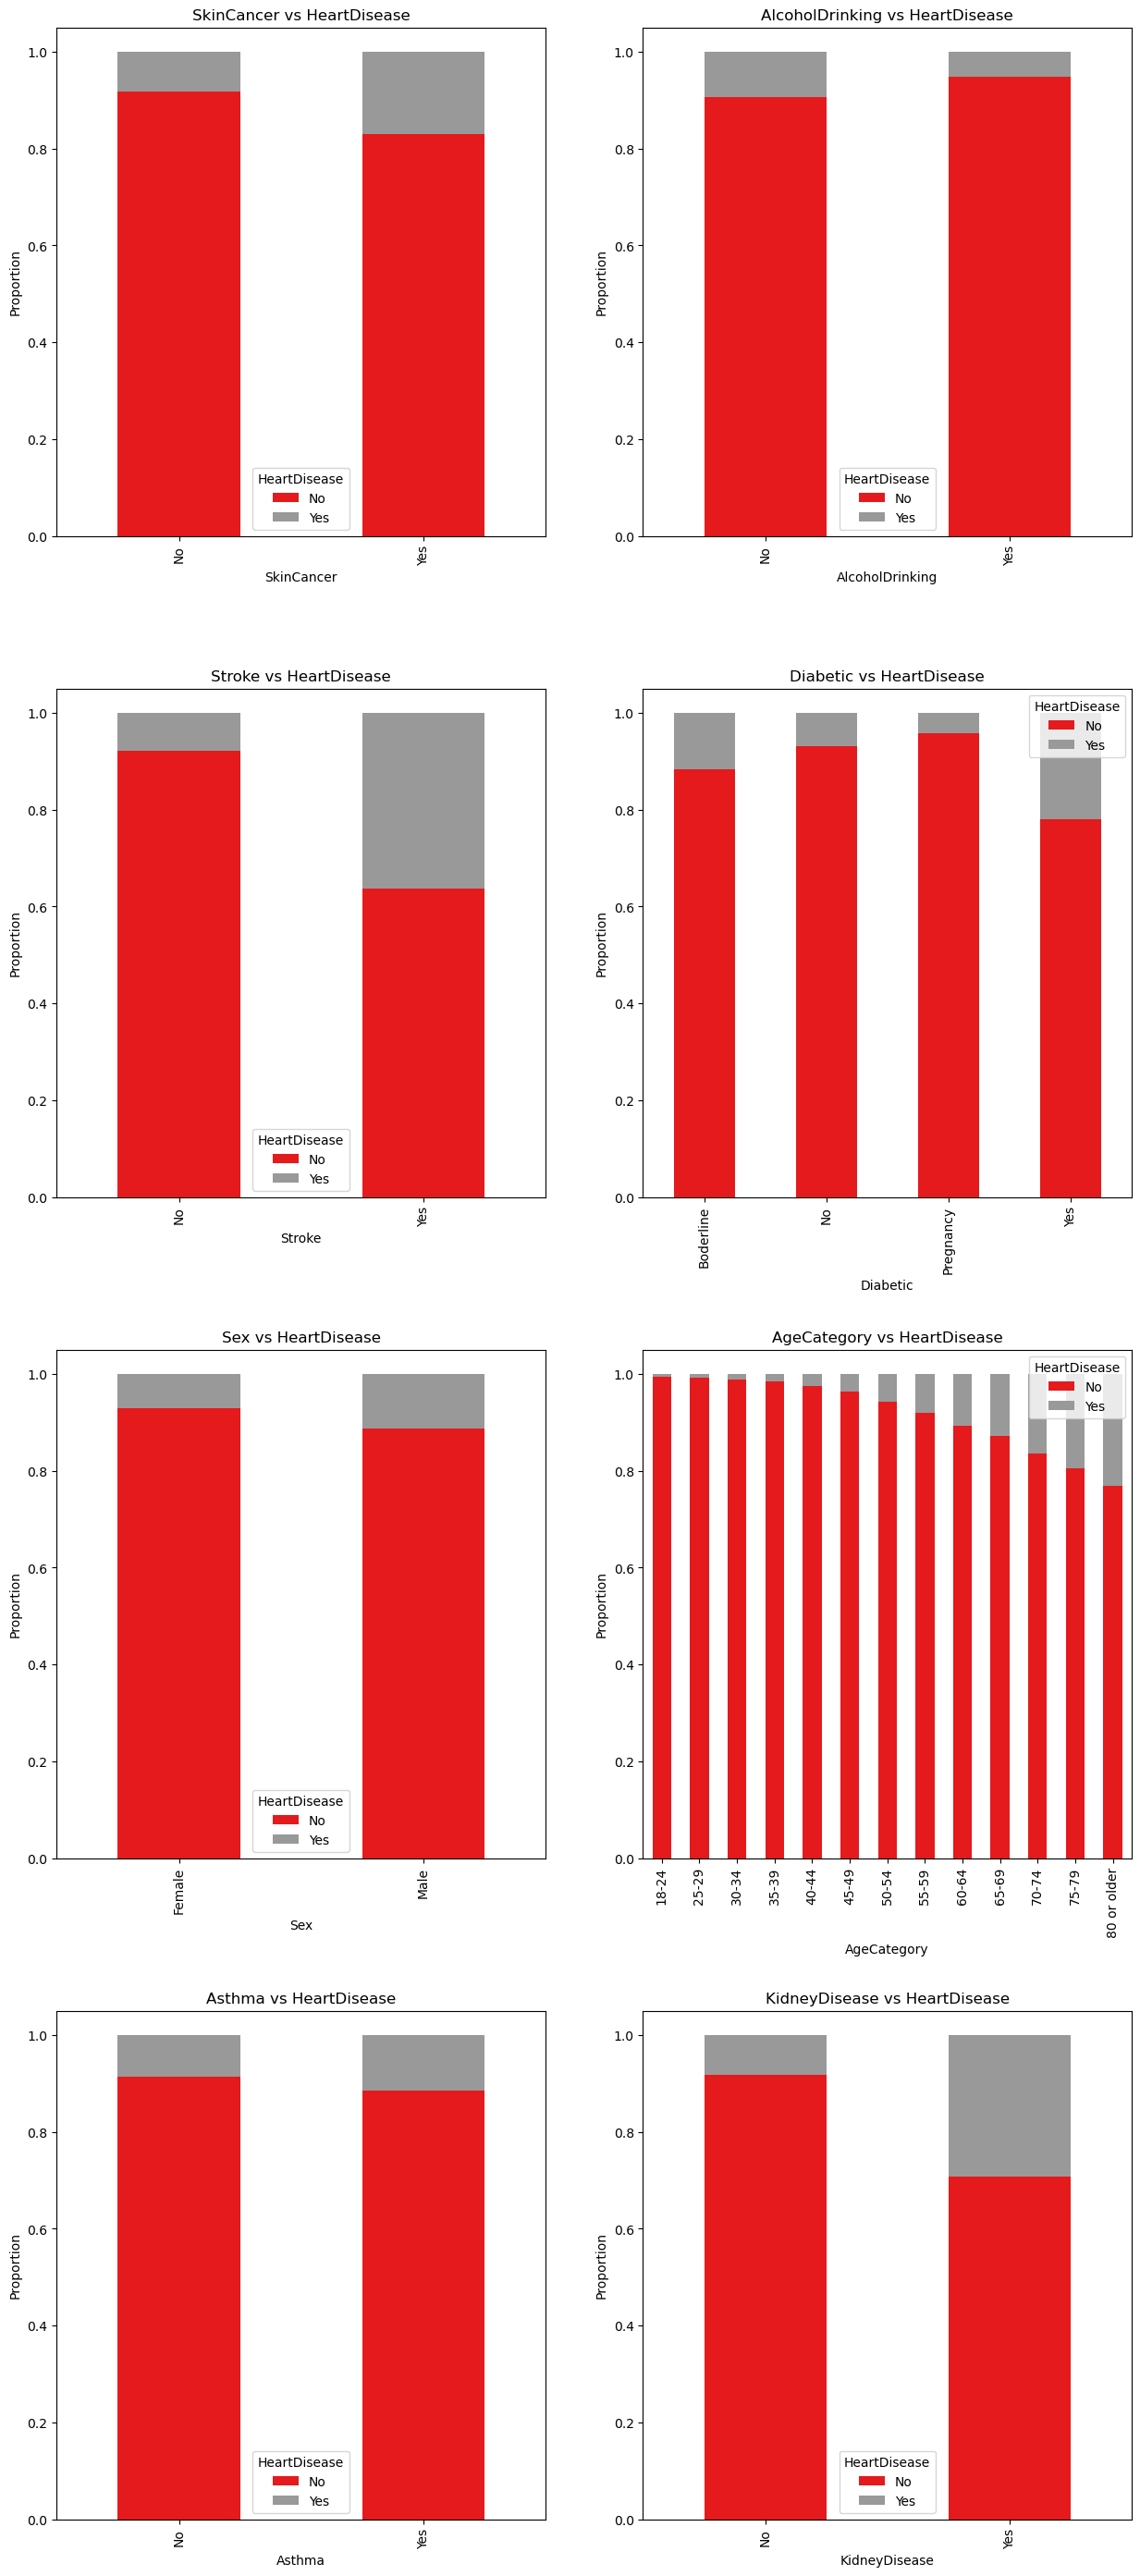

In [280]:
def stacked_bar(data, feature, target, ax, color_palette='tab20'):
  crosstab = pd.crosstab(data[feature], data[target], normalize='index')
  crosstab.plot(kind='bar', stacked=True, ax=ax, colormap=color_palette)
  ax.set_title(f'{feature} vs {target}')
  ax.set_ylabel('Proportion')

# Set up the figure
fig, axes = plt.subplots(4, 2, figsize=(15, 35))

# Color palette selection (optional)
color_palette = 'Set1' 

# Plot each feature
stacked_bar(df, 'SkinCancer', 'HeartDisease', axes[0, 0], color_palette=color_palette)
stacked_bar(df, 'AlcoholDrinking', 'HeartDisease', axes[0, 1], color_palette=color_palette)
stacked_bar(df, 'Stroke', 'HeartDisease', axes[1, 0], color_palette=color_palette)
stacked_bar(df, 'Diabetic', 'HeartDisease', axes[1, 1], color_palette=color_palette)
stacked_bar(df, 'Sex', 'HeartDisease', axes[2, 0], color_palette=color_palette)
stacked_bar(df, 'AgeCategory', 'HeartDisease', axes[2, 1], color_palette=color_palette)
stacked_bar(df, 'Asthma', 'HeartDisease', axes[3, 0], color_palette=color_palette)
stacked_bar(df, 'KidneyDisease', 'HeartDisease', axes[3, 1], color_palette=color_palette)
# Adjust layout
plt.subplots_adjust(hspace=0.3)
plt.show()

In [281]:
X = df.drop("HeartDisease", axis=1)  # Features
y = df["HeartDisease"]  # Target

In [282]:
rus = RandomUnderSampler(random_state=45)  # Random seed for reproducibility
X_resampled, y_resampled = rus.fit_resample(X, y)

In [283]:
print("Class distribution after undersampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after undersampling:
HeartDisease
No     27261
Yes    27261
Name: count, dtype: int64


In [284]:
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['HeartDisease'] = y_resampled

In [285]:
resampled_df=resampled_df.reset_index(drop=True)
resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54522 entries, 0 to 54521
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BMI               54522 non-null  float64
 1   Smoking           54522 non-null  object 
 2   AlcoholDrinking   54522 non-null  object 
 3   Stroke            54522 non-null  object 
 4   PhysicalHealth    54522 non-null  float64
 5   MentalHealth      54522 non-null  float64
 6   DiffWalking       54522 non-null  object 
 7   Sex               54522 non-null  object 
 8   AgeCategory       54522 non-null  object 
 9   Race              54522 non-null  object 
 10  Diabetic          54522 non-null  object 
 11  PhysicalActivity  54522 non-null  object 
 12  GenHealth         54522 non-null  object 
 13  SleepTime         54522 non-null  float64
 14  Asthma            54522 non-null  object 
 15  KidneyDisease     54522 non-null  object 
 16  SkinCancer        54522 non-null  object

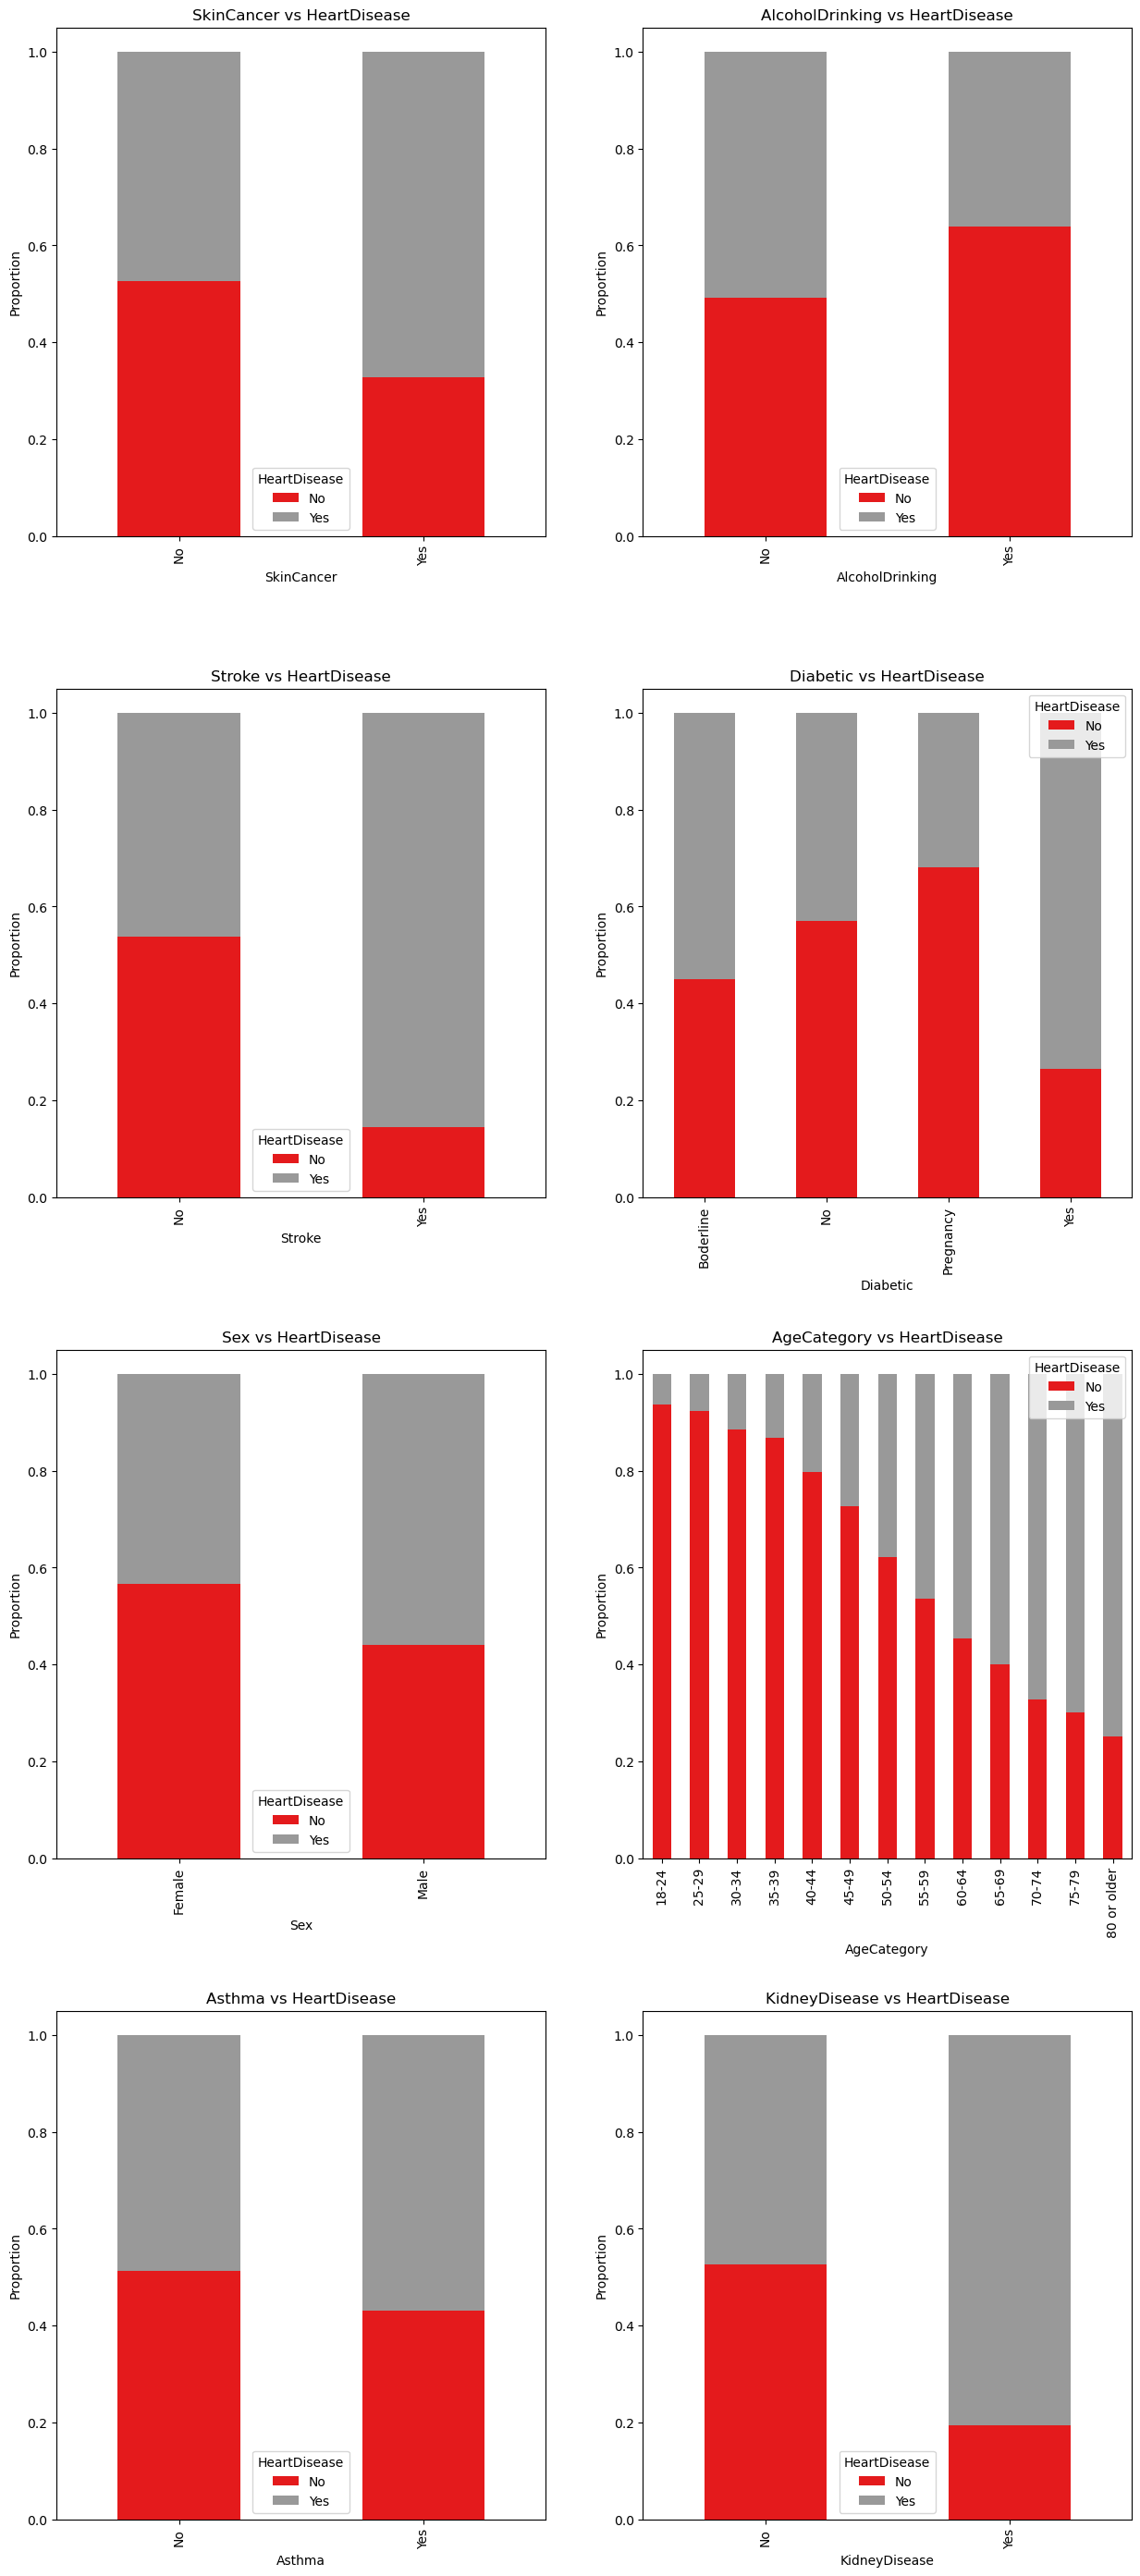

In [286]:
# Set up the figure
fig, axes = plt.subplots(4, 2, figsize=(15, 35))

# Color palette selection (optional)
color_palette = 'Set1' 
stacked_bar(resampled_df, 'SkinCancer', 'HeartDisease', axes[0, 0], color_palette=color_palette)
stacked_bar(resampled_df, 'AlcoholDrinking', 'HeartDisease', axes[0, 1], color_palette=color_palette)
stacked_bar(resampled_df, 'Stroke', 'HeartDisease', axes[1, 0], color_palette=color_palette)
stacked_bar(resampled_df, 'Diabetic', 'HeartDisease', axes[1, 1], color_palette=color_palette)
stacked_bar(resampled_df, 'Sex', 'HeartDisease', axes[2, 0], color_palette=color_palette)
stacked_bar(resampled_df, 'AgeCategory', 'HeartDisease', axes[2, 1], color_palette=color_palette)
stacked_bar(resampled_df, 'Asthma', 'HeartDisease', axes[3, 0], color_palette=color_palette)
stacked_bar(resampled_df, 'KidneyDisease', 'HeartDisease', axes[3, 1], color_palette=color_palette)
plt.subplots_adjust(hspace=0.3)
plt.show()

## Feature Selection (Lab 2)
The dataset has 18 features and we need to go through the process of selecting features

In [287]:
def encode_and_drop(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object']).columns.tolist()

    # Initialize OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    # Apply one-hot encoding 
    oh_encoded = encoder.fit_transform(dataframe[categorical_columns])
    oh_df = pd.DataFrame(oh_encoded, columns=encoder.get_feature_names_out(categorical_columns))

    # Concatenate the one-hot encoded dataframe with the original dataframe
    df_encode = pd.concat([dataframe, oh_df], axis=1)

    # Drop one of the encoded columns for each original binary feature
    for col in categorical_columns:
        encoded_cols = [c for c in oh_df.columns if col in c]
        if len(encoded_cols) == 2:  # It's a binary feature
            df_encode = df_encode.drop(encoded_cols[0], axis=1)  # Drop from df_encode

    # Drop original categorical columns 
    df_encode = df_encode.drop(categorical_columns, axis=1)

    heart_disease_col = [col for col in df_encode.columns if 'HeartDisease_Yes' in col][0] 
    df_encode = df_encode[[c for c in df_encode if c != heart_disease_col] + [heart_disease_col]]


    return df_encode

In [288]:
df_encoded = encode_and_drop(df)
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301717 entries, 0 to 301716
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   BMI                                  301717 non-null  float64
 1   PhysicalHealth                       301717 non-null  float64
 2   MentalHealth                         301717 non-null  float64
 3   SleepTime                            301717 non-null  float64
 4   Smoking_Yes                          301717 non-null  float64
 5   AlcoholDrinking_Yes                  301717 non-null  float64
 6   Stroke_Yes                           301717 non-null  float64
 7   DiffWalking_Yes                      301717 non-null  float64
 8   Sex_Male                             301717 non-null  float64
 9   AgeCategory_18-24                    301717 non-null  float64
 10  AgeCategory_25-29                    301717 non-null  float64
 11  AgeCategory_3

In [289]:
df_encoded.tail(30)

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_18-24,...,PhysicalActivity_Yes,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes,HeartDisease_Yes
301687,39.87,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
301688,38.45,30.0,15.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
301689,36.90,0.0,0.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301690,36.21,0.0,0.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
301691,32.78,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
301692,25.25,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
301693,26.63,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
301694,23.62,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
301695,30.90,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301696,26.45,3.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [290]:
has_infs = np.any(np.isinf(df_encoded))
if has_infs:
    print("DataFrame contains infinities (infs).")
    # You can further investigate which columns have infs:
    inf_counts = np.isinf(df_encoded).sum()
    print("Number of infs per column:\n", inf_counts)
else:
    print("DataFrame does not contain infinities (infs).")

# Check for NaNs (missing values)
has_nans = df_encoded.isnull().values.any()
if has_nans:
    print("DataFrame contains NaNs (missing values).")
    # You can further investigate which columns have NaNs:
    nan_counts = df_encoded.isnull().sum()
    print("Number of NaNs per column:\n", nan_counts)
else:
    print("DataFrame does not contain NaNs (missing values).")

DataFrame does not contain infinities (infs).
DataFrame does not contain NaNs (missing values).


In [291]:
# Remove rows with any null values
data_encoded = df_encoded.dropna()

# Print the shape before and after removing nulls
print("Dataframe shape before:", df_encoded.shape)
print("Dataframe shape after:", data_encoded.shape)

Dataframe shape before: (301717, 42)
Dataframe shape after: (301717, 42)


In [292]:
# 1. Correlation with continuous features (Point-Biserial)
def pointBiserialCalc(dataframe):
    continuous_features = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]
    correlations_continuous = {}
    for feature in continuous_features:
        correlation, p_value = pointbiserialr(dataframe[feature], dataframe["HeartDisease_Yes"])
        correlations_continuous[feature] = correlation
    print("Correlations with continuous features:\n", correlations_continuous)


In [293]:
resample_encoded=encode_and_drop(resampled_df)
has_nans = resample_encoded.isnull().values.any()
if has_nans:
    print("DataFrame contains NaNs (missing values).")
    # You can further investigate which columns have NaNs:
    nan_counts = resample_encoded.isnull().sum()
    print("Number of NaNs per column:\n", nan_counts)
else:
    print("DataFrame does not contain NaNs (missing values).")

DataFrame does not contain NaNs (missing values).


In [294]:
resample_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54522 entries, 0 to 54521
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   BMI                                  54522 non-null  float64
 1   PhysicalHealth                       54522 non-null  float64
 2   MentalHealth                         54522 non-null  float64
 3   SleepTime                            54522 non-null  float64
 4   Smoking_Yes                          54522 non-null  float64
 5   AlcoholDrinking_Yes                  54522 non-null  float64
 6   Stroke_Yes                           54522 non-null  float64
 7   DiffWalking_Yes                      54522 non-null  float64
 8   Sex_Male                             54522 non-null  float64
 9   AgeCategory_18-24                    54522 non-null  float64
 10  AgeCategory_25-29                    54522 non-null  float64
 11  AgeCategory_30-34           

In [295]:
pointBiserialCalc(data_encoded)
pointBiserialCalc(resample_encoded)

Correlations with continuous features:
 {'BMI': 0.04725995828942998, 'PhysicalHealth': 0.16523521706063268, 'MentalHealth': 0.020912907114268103, 'SleepTime': 0.010833662257900384}
Correlations with continuous features:
 {'BMI': 0.0744510038196731, 'PhysicalHealth': 0.23464076076218696, 'MentalHealth': 0.03640639006577138, 'SleepTime': 0.014148864370274456}


In [299]:
def cramers_v(x, y):
    """
    Calculates Cramer's V statistic for categorical-categorical association.
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0,
    phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


def calculate_cramers_v_correlations(df, target_variable):

    # Get the target variable 
    heart_disease = df[target_variable]

    # Select categorical features (excluding the target variable)
    categorical_features = [col for col in df.columns if '_' in col and col != target_variable]

    # Calculate Cramer's V for each categorical feature with the target variable
    cramers_v_correlations = {}
    for feature in categorical_features:
        cramers_v_correlations[feature] = cramers_v(df[feature], heart_disease)

    return cramers_v_correlations

# Example usage with two DataFrames:
df_correlations = calculate_cramers_v_correlations(data_encoded, 'HeartDisease_Yes')
df_re_correlations = calculate_cramers_v_correlations(resample_encoded, 'HeartDisease_Yes')

# Print the results for df1
print("Cramer's V correlations with HeartDisease_Yes in df1:")
for feature, correlation in df_correlations.items():
    print(f"{feature}: {correlation:.4f}")

# Print the results for df2
print("\nCramer's V correlations with HeartDisease_Yes in df2:")
for feature, correlation in df_re_correlations.items():
    print(f"{feature}: {correlation:.4f}")

Cramer's V correlations with HeartDisease_Yes in df1:
Smoking_Yes: 0.1045
AlcoholDrinking_Yes: 0.0362
Stroke_Yes: 0.1946
DiffWalking_Yes: 0.1964
Sex_Male: 0.0744
AgeCategory_18-24: 0.0779
AgeCategory_25-29: 0.0685
AgeCategory_30-34: 0.0682
AgeCategory_35-39: 0.0689
AgeCategory_40-44: 0.0609
AgeCategory_45-49: 0.0510
AgeCategory_50-54: 0.0326
AgeCategory_55-59: 0.0117
AgeCategory_60-64: 0.0189
AgeCategory_65-69: 0.0457
AgeCategory_70-74: 0.0848
AgeCategory_75-79: 0.0985
AgeCategory_80 or older: 0.1434
Race_American Indian/Alaskan Native: 0.0062
Race_Asian: 0.0328
Race_Black: 0.0144
Race_Hispanic: 0.0406
Race_Other: 0.0058
Race_White: 0.0488
Diabetic_Boderline: 0.0136
Diabetic_No: 0.1659
Diabetic_Pregnancy: 0.0153
Diabetic_Yes: 0.1789
PhysicalActivity_Yes: 0.0936
GenHealth_Excellent: 0.1132
GenHealth_Fair: 0.1432
GenHealth_Good: 0.0317
GenHealth_Poor: 0.1724
GenHealth_Very good: 0.1005
Asthma_Yes: 0.0357
KidneyDisease_Yes: 0.1426
SkinCancer_Yes: 0.0906

Cramer's V correlations with Heart